In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas

In [45]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [46]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [48]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [49]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [50]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [51]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [52]:
df.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [53]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [54]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

# Graphs

<Axes: xlabel='v1', ylabel='Count'>

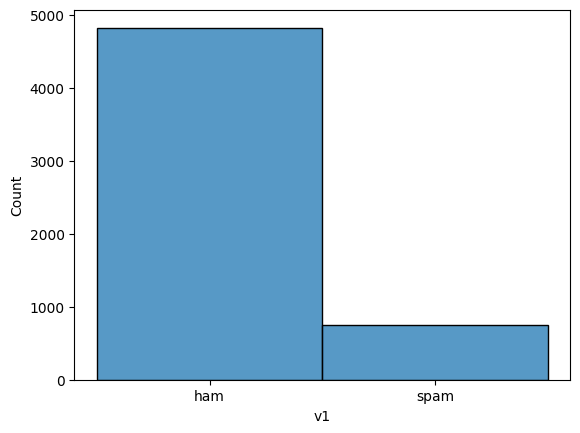

In [55]:
sns.histplot(df['v1'])

<Axes: ylabel='v1'>

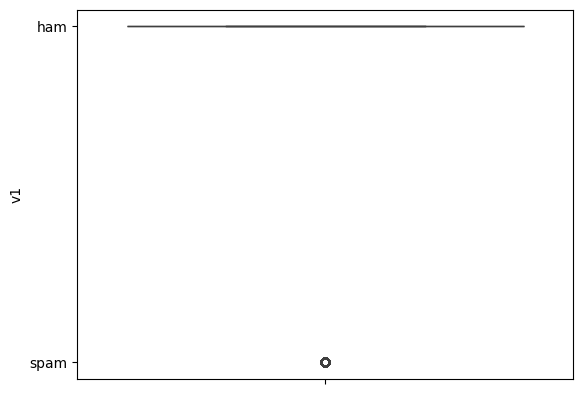

In [56]:
sns.boxplot(df['v1'])

<Axes: xlabel='v1', ylabel='count'>

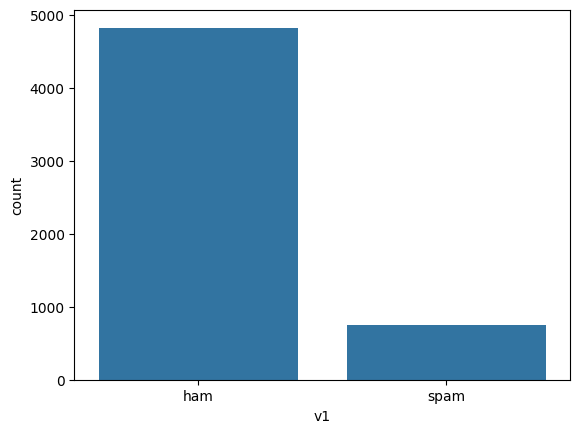

In [57]:
sns.countplot(data=df,x='v1')

In [58]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


([<matplotlib.patches.Wedge at 0x7e1fae913c10>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.2776546040791428, -0.5723623962799874, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59%'),
  Text(0.8213493883365917, -0.3679472547514204, '13.41%')])

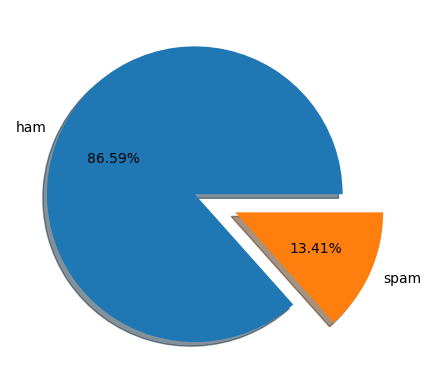

In [59]:
plt.pie(df['v1'].value_counts(),labels=df['v1'].value_counts().index,shadow=True,explode=[0,0.3],autopct='%1.2f%%')

# Count Vectorizer (converting text doc into matrix of token)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
vectorizer= CountVectorizer()

In [62]:
x=vectorizer.fit_transform(df['v2'])

In [63]:
y=df['v1']

In [64]:
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>

In [65]:
x.shape

(5572, 8672)

# SMOTE

In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [67]:
sm=SMOTE(random_state=42) #making Object(sm)

In [68]:
x_res, y_res = sm.fit_resample(x,y)

In [69]:
le=LabelEncoder()

In [70]:
y_res=le.fit_transform(y_res)

train text

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.33,random_state=42)

# MultinomialNB

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [73]:
clf = MultinomialNB()

In [80]:
clf.fit(x_train,y_train)

MultinomialNB()

In [81]:
y_pred=clf.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred)

0.9714285714285714

In [86]:
confusion_matrix(y_test,y_pred)

array([[1584,   24],
       [  67, 1510]])

<Axes: >

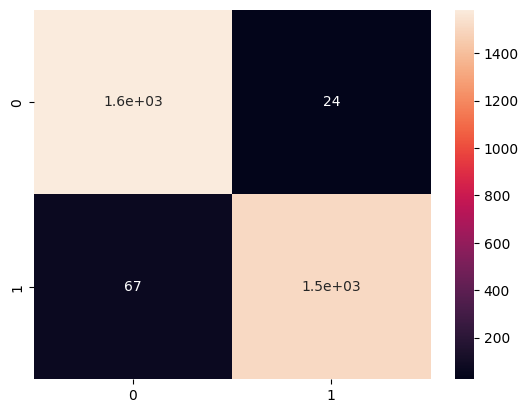

In [88]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1608
           1       0.98      0.96      0.97      1577

    accuracy                           0.97      3185
   macro avg       0.97      0.97      0.97      3185
weighted avg       0.97      0.97      0.97      3185

